In [ ]:
!pip install git+https://github.com/huggingface/diffusers.git
!pip install transformers torch accelerate datasets

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-2vm7tsba
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-2vm7tsba
  Resolved https://github.com/huggingface/diffusers.git to commit 7007febae5cff000d4df9059d9cf35133e8b2ca9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!git clone https://github.com/huggingface/diffusers


fatal: destination path 'diffusers' already exists and is not an empty directory.


In [ ]:
%cd diffusers/examples/text_to_image
!pip install -r requirements.txt

/content/diffusers/examples/text_to_image


In [ ]:
from datasets import load_dataset

# Load a confirmed public dataset
dataset = load_dataset("diffusers/pokemon-gpt4-captions", split="train")
dataset = dataset.shuffle(seed=42).select(range(50))  # Use 50 samples for speed
print(dataset[0])  # Verify it works

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x1280 at 0x7A514D0ADA10>, 'text': 'An illustration of Ampharos, a yellow, bipedal, electric-type Pokémon with black stripes, a white belly, a long neck, and a red orb at the end of its tail and on its forehead.'}


In [ ]:
from datasets import load_dataset
import os

# Load and subset the dataset
dataset = load_dataset("diffusers/pokemon-gpt4-captions", split="train")
dataset = dataset.shuffle(seed=42).select(range(50))  # 50 samples
print(dataset[0])  # Should work

# Save locally
os.makedirs("pokemon_data", exist_ok=True)
for i, example in enumerate(dataset):
    example["image"].save(f"pokemon_data/image_{i}.png")
    with open(f"pokemon_data/caption_{i}.txt", "w") as f:
        f.write(example["text"])

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x1280 at 0x7A51375DFF50>, 'text': 'An illustration of Ampharos, a yellow, bipedal, electric-type Pokémon with black stripes, a white belly, a long neck, and a red orb at the end of its tail and on its forehead.'}


In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"
output_dir = "fine_tuned_pokemon"

!accelerate launch train_text_to_image.py --pretrained_model_name_or_path={model_id} --train_data_dir="pokemon_data" --output_dir={output_dir} --resolution=256 --train_batch_size=1 --num_train_epochs=1 --max_train_steps=30 --gradient_accumulation_steps=1 --learning_rate=1e-5 --lr_scheduler="constant" --lr_warmup_steps=0

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-03-01 18:23:04.876328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740853384.898373    8050 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740853384.904852    8050 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-01 18:23:04.926473: I tensorflow/core/platform

In [ ]:
import torch

In [ ]:
!ls fine_tuned_pokemon
!ls fine_tuned_pokemon/unet  # If unet folder exists

ls: cannot access 'fine_tuned_pokemon/unet': No such file or directory


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

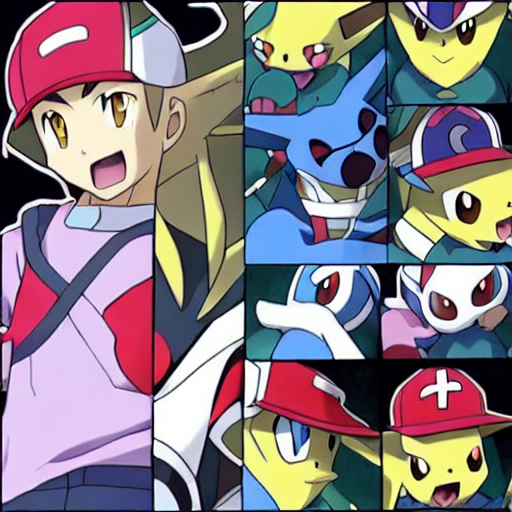

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load base model only
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Generate
prompt = "A cool Pokémon in anime style"
image = pipe(prompt).images[0]
image.save("generated_pokemon.png")

from IPython.display import Image
Image("generated_pokemon.png")

In [ ]:
!pip install gradio

from diffusers import StableDiffusionPipeline
import torch
import gradio as gr

# Load the base model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Define the generation function
def generate_pokemon(prompt):
    image = pipe(prompt).images[0]
    return image

# Create Gradio interface
interface = gr.Interface(
    fn=generate_pokemon,
    inputs=gr.Textbox(label="Enter a prompt (e.g., 'A cool Pokémon in anime style')"),
    outputs=gr.Image(label="Generated Pokémon"),
    title="Pokémon Generator with Stable Diffusion",
    description="Generate custom Pokémon images from text prompts!"
)

# Launch it
interface.launch(share=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://54a53520a107e2a79d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
